<a href="https://colab.research.google.com/github/surajgazi100/DATA_SCIENCE_STATISTICS/blob/main/ANOVA_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANOVA using Python

 Renesh Bedre    October 22, 2018      8 minute read
What is ANOVA (ANalysis Of VAriance)?

used to compare the means of more than 2 groups (t-test can be used to compare 2 groups)
groups mean differences inferred by analyzing variances
Main types: One-way (one factor) and two-way (two factors) ANOVA (factor is an independent variable)
Note: In ANOVA, group, factors, and independent variables are similar terms

ANOVA Hypotheses

Null hypotheses: Groups means are equal (no variation in means of groups)
Alternative hypotheses: At least, one group mean is different from other groups
ANOVA Assumptions

Residuals (experimental error) are normally distributed (Shapiro-Wilks Test)
Homogeneity of variances (variances are equal between treatment groups) (Levene or Bartlett Test)
Observations are sampled independently from each other

How ANOVA works?

Check sample sizes: equal number of observation in each group
Calculate Mean Square for each group (MS) (SS of group/level-1); level-1 is a degree of freedom (df) for a group
Calculate Mean Square error (MSE) (SS error/df of residuals)
Calculate F-value (MS of group/MSE)
One-way (one factor) ANOVA with Python

Example data for one-way ANOVA analysis tutorial, dataset

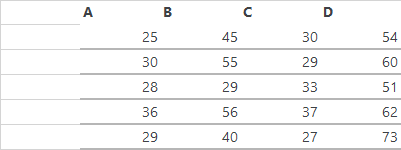

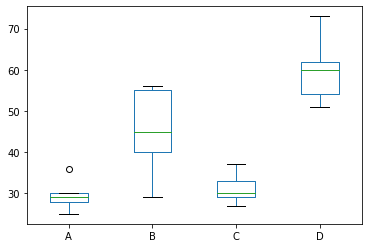

In [1]:
# I am using Python 3
# load packages
import pandas as pd
# load data file
d = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can easily detect the differences 
# between different treatments
d.boxplot(column=['A', 'B', 'C', 'D'], grid=False)

In [3]:
# load packages
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(d['A'], d['B'], d['C'], d['D'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols
# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(d.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
d_melt.columns = ['index', 'treatments', 'value']
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
# output


# note: if the data is balanced (equal sample size for each group), Type 1, 2, and 3 sums of squares
# (typ parameter) will produce similar results.

17.492810457516338 2.639241146210922e-05


,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


Interpretation: The P-value obtained from ANOVA analysis is significant (P<0.05), and therefore, we conclude that there are significant differences among treatments.

Note: If you have unbalanced (unequal sample size for each group) data, you can perform similar steps as described for one-way ANOVA with balanced design (equal sample size for each group).

From ANOVA analysis, we know that treatment differences are statistically significant, but ANOVA does not tell which treatments are significantly different from each other. To know the pairs of significant different treatments, we will perform multiple pairwise comparison (Post-hoc comparison) analysis using Tukey HSD test.

In [5]:
pip install bioinfokit

     |████████████████████████████████| 71kB 2.0MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-1.0.1-cp36-none-any.whl size=51297 sha256=32d3ad8a604fb12396f8b8354fe62a65035fdd34658d8eaf29d116e8e540e5b2
  Stored in directory: /root/.cache/pip/wheels/55/2f/fd/dfef99461de15e2011e8f3c65ceaaf28afacc72920076f433a
  Created wheel for adjustText: filename=adjustText-0.7.3-cp36-none-any.whl size=7099 sha256=fd118f3d59c6a96aa0988959084280ada189e7cecebcb0059e8ac5b9f47bf6d2
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built bioinfokit adjustText


In [6]:
# we will use bioinfokit (v1.0.1 or later) for performing tukey HSD test
# check documentation here https://reneshbedre.github.io/blog/howtoinstall.html
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=d_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,15.4,1.692871,29.107129,4.546156,0.025070
1,A,C,1.6,-12.107129,15.307129,0.472328,0.900000
2,A,D,30.4,16.692871,44.107129,8.974231,0.001000
3,B,C,13.8,0.092871,27.507129,4.073828,0.048178
4,B,D,15.0,1.292871,28.707129,4.428074,0.029578
5,C,D,28.8,15.092871,42.507129,8.501903,0.001000


Above results from Tukey HSD suggests that except A-C, all other pairwise comparisons for treatments rejects null hypothesis (P-tukey<0.05) and indicates statistical significant differences.

Test ANOVA assumptions

The Shapiro-Wilk test can be used to check the normal distribution of residuals . Null hypothesis: data is drawn from normal distribution.

In [7]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9685019850730896 0.7229772806167603


As the P-value is non significant, we fail to reject null hypothesis and conclude that data is drawn from normal distribution.

As the data is drawn from normal distribution, use Bartlett’s test to check the Homogeneity of variances. Null hypothesis: samples from populations have equal variances.

In [8]:
# load packages
import scipy.stats as stats
w, pvalue = stats.bartlett(d['A'], d['B'], d['C'], d['D'])
print(w, pvalue)

5.687843565012841 0.1278253399753447


As the P-value (0.12) is non significant, we fail to reject null hypothesis and conclude that treatments have equal variances.

Levene test can be used to check the Homogeneity of variances when the data is not drawn from normal distribution.

Two-way (two factor) ANOVA with Python

Example data for two-way ANOVA analysis tutorial, dataset

From dataset, there are two factors (independent variables) viz. genotypes and yield in years. Genotypes and years has five and three levels respectively (see one-way ANOVA to know factors and levels).

For this experimental design, there are two factors to evaluate, and therefore, two-way ANOVA method is suitable for analysis. Here, using two-way ANOVA, we can simultaneously evaluate how type of genotype and years affects the yields of plants. If you apply one-way ANOVA here, you can able to evaluate only one factor at a time.

From two-way ANOVA, we can tests three hypotheses 1) effect of genotype on yield 2) effect of time (years) on yield, and 3) effect of genotype and time (years) interactions on yield

In [9]:
# load packages
import pandas as pd
import seaborn as sns
# load data file
d = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/twowayanova.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
# you do not need to reshape if your data is already in stacked format. Compare d and d_melt tables for detail 
# understanding 
d_melt = pd.melt(d, id_vars=['Genotype'], value_vars=['1_year', '2_year', '3_year'])
# replace column names
d_melt.columns = ['Genotype', 'years', 'value']
d_melt.head()

,Genotype,years,value
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94


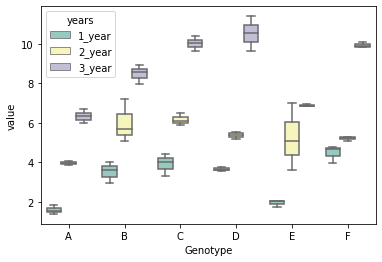

In [10]:
sns.boxplot(x="Genotype", y="value", hue="years", data=d_melt, palette="Set3") 

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Ordinary Least Squares (OLS) model
# C(Genotype):C(years) represent interaction term
model = ols('value ~ C(Genotype) + C(years) + C(Genotype):C(years)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Genotype),58.551733,5.0,32.748581,1.931655e-12
C(years),278.925633,2.0,390.014868,4.006243e-25
C(Genotype):C(years),17.122967,10.0,4.788525,2.230094e-04
Residual,12.873000,36.0,NaN,NaN


Interpretation: The P-value obtained from ANOVA analysis for genotype, years, and interaction are statistically significant (P<0.05). We conclude that type of genotype significantly affects the yield outcome, time (years) significantly affects the yield outcome, and interaction of both genotype and time (years) significantly affects the yield outcome.

Note: If you have unbalanced (unequal sample size for each group) data, you can perform similar steps as described for two-way ANOVA with the balanced design but set `typ=3`. Type 3 sums of squares (SS) is recommended for an unbalanced design for multifactorial ANOVA.

Now, we know that genotype and time (years) differences are statistically significant, but ANOVA does not tell which genotype and time (years) are significantly different from each other. To know the pairs of significant different genotype and time (years), perform multiple pairwise comparison (Post-hoc comparison) analysis using Tukey HSD test.

# we will use bioinfokit (v1.0.1 or later) for performing tuke

In [12]:
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
# for main effect Genotype
res.tukey_hsd(df=d_melt, res_var='value', xfac_var='Genotype', anova_model='value ~ C(Genotype) + C(years) + C(Genotype):C(years)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,2.040000,1.191912,2.888088,10.234409,0.001000
1,A,C,2.733333,1.885245,3.581421,13.712771,0.001000
2,A,D,2.560000,1.711912,3.408088,12.843180,0.001000
3,A,E,0.720000,-0.128088,1.568088,3.612145,0.135306
4,A,F,2.573333,1.725245,3.421421,12.910072,0.001000
5,B,C,0.693333,-0.154755,1.541421,3.478361,0.163609
6,B,D,0.520000,-0.328088,1.368088,2.608771,0.453066
7,B,E,1.320000,0.471912,2.168088,6.622265,0.001000
8,B,F,0.533333,-0.314755,1.381421,2.675663,0.425189
9,C,D,0.173333,-0.674755,1.021421,0.869590,0.900000


In [14]:
res.tukey_hsd(df=d_melt, res_var='value', xfac_var='years', anova_model='value ~ C(Genotype) + C(years) + C(Genotype):C(years)')
res.tukey_summary
# output



,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1_year,2_year,2.146667,1.659513,2.633821,15.230432,0.001
1,1_year,3_year,5.521667,5.034513,6.008821,39.175794,0.001
2,2_year,3_year,3.375000,2.887846,3.862154,23.945361,0.001


In [15]:
# for interaction effect between genotype and years
res.tukey_hsd(df=d_melt, res_var='value', xfac_var=['Genotype','years'], anova_model='value ~ C(Genotype) + C(years) + C(Genotype):C(years)')
res.tukey_summary.head()

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(A, 1_year)","(A, 2_year)",2.38,0.548861,4.211139,6.893646,0.002439
1,"(A, 1_year)","(A, 3_year)",4.75,2.918861,6.581139,13.758326,0.001000
2,"(A, 1_year)","(B, 1_year)",1.94,0.108861,3.771139,5.619190,0.028673
3,"(A, 1_year)","(B, 2_year)",4.41,2.578861,6.241139,12.773520,0.001000
4,"(A, 1_year)","(B, 3_year)",6.90,5.068861,8.731139,19.985779,0.001000
